In [108]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats.mstats import gmean
import scipy.optimize as opt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import numpy as np
from pathlib import Path

In [109]:
p = Path('D:/qs-analysis/compiled-data')

files = list(p.glob('**/*.pkl'))
data = pd.DataFrame(columns=['FITC-A','AHL','IPTG','Family','Replicate'])
for f in files:
    family = str(f.parent).split('\\')[-1]
    tmp = pd.read_pickle(f)
    data = data.append(tmp,ignore_index=True)


In [110]:
data

,FITC-A,AHL,IPTG,Family,Replicate
0,7241.040039,1.000000e-06,0.000,Las,1
1,6172.149902,1.000000e-06,0.000,Las,1
2,12896.099609,1.000000e-06,0.000,Las,1
3,11553.089844,1.000000e-06,0.000,Las,1
4,11425.819336,1.000000e-06,0.000,Las,1
5,11529.950195,1.000000e-06,0.000,Las,1
6,10162.910156,1.000000e-06,0.000,Las,1
7,9304.950195,1.000000e-06,0.000,Las,1
8,11276.299805,1.000000e-06,0.000,Las,1
9,15248.370117,1.000000e-06,0.000,Las,1


In [111]:
# Subtract WT background from samples
#data = data[data['FITC-A'] >= 0]
data['FITC-A'] = data['FITC-A'] - data[data.Family=='WT']['FITC-A'].median()
data = data[data.Family != 'WT']

In [112]:
data.IPTG = data.IPTG.astype('int') * 1e3

C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [113]:
gb = data.groupby(['AHL','IPTG','Family'])
Norm = gb.transform(lambda x: x / x.max() * 100)['FITC-A']
Norm.name = 'Norm'
Data = pd.concat([data,Norm],axis=1)
lg = gb.AHL.transform(np.log10).sort_values()
lg[lg == -np.inf] = 0
lg = lg.astype('int32')
lg.name = 'logAHL'
Data = pd.concat([Data,lg],axis=1)

C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\pandas\core\groupby\groupby.py:3650: RuntimeWarning: divide by zero encountered in log10
  wrapper = lambda x: func(x, *args, **kwargs)


In [114]:
mfi = Data.groupby(['AHL','IPTG','Family'])[['FITC-A','Norm','logAHL']].median().reset_index()

In [115]:
mfi

,AHL,IPTG,Family,FITC-A,Norm,logAHL
0,0.000000e+00,0.0,LuxR,1104.400009,9.288728,0
1,1.000000e-12,0.0,Las,3444.129990,11.290205,-12
2,1.000000e-12,0.0,Tra,3444.129990,11.290205,-12
3,1.000000e-10,0.0,Las,3194.930038,9.252131,-10
4,1.000000e-10,0.0,LuxR,1127.280014,4.477888,-10
5,1.000000e-10,0.0,Tra,3194.930038,9.252131,-10
6,1.000000e-09,0.0,LuxR,1531.199936,11.030110,-9
7,1.000000e-08,0.0,Las,7235.529648,18.932152,-8
8,1.000000e-08,0.0,LuxR,3148.639999,14.033975,-8
9,1.000000e-08,0.0,Tra,7235.529648,18.932152,-8


In [116]:
# Heatmaps

In [117]:
lx = mfi[mfi.Family=='LuxR']
lx

,AHL,IPTG,Family,FITC-A,Norm,logAHL
0,0.000000e+00,0.0,LuxR,1104.400009,9.288728,0
4,1.000000e-10,0.0,LuxR,1127.280014,4.477888,-10
6,1.000000e-09,0.0,LuxR,1531.199936,11.030110,-9
8,1.000000e-08,0.0,LuxR,3148.639999,14.033975,-8
10,1.000000e-07,0.0,LuxR,6363.280136,22.181662,-7
12,1.000000e-06,0.0,LuxR,7120.959824,19.397832,-6
14,1.000000e-05,0.0,LuxR,7395.519882,9.225027,-5
16,1.000000e-04,0.0,LuxR,7762.479843,24.401106,-4


In [118]:
def make_heatmap(median_fluorescence,ax=None, **kwargs):
    """
    This is a function to generate heatmaps
    
    Args:
        median_fluorescence (pd.DataFrame)
        DataFrame of filtered single family Lux/Las/Tra flow cytometry median fluorescence intensity (mfi)
        
        ax (plt.ax)
        Axis to plot data on
        
        **kwargs
        Addition arguments to pass to sns.heatmap
    """
    sns.set_context('paper')
    ax = ax or plt.gca()
    # normalized
    norm = median_fluorescence[median_fluorescence.logAHL != 0].copy()
    norm['FITC-A']=norm['FITC-A']/norm['FITC-A'].max()*100

    piv = norm.pivot_table(index='IPTG', columns='logAHL', values='FITC-A')
    g = sns.heatmap(piv, vmin=0,ax=ax,**kwargs)
    cbar = g.collections[0].colorbar
    cbar.set_ticks([0, 25, 50, 75,100])
    cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
    cbar.ax.set_ylabel('Relative Expression Level')
    ax.set_xlabel(r'AHL ($10^x$ M)')
    ax.set_ylabel(r'IPTG ($\mu M$)')
    #f.tight_layout()
    return ax

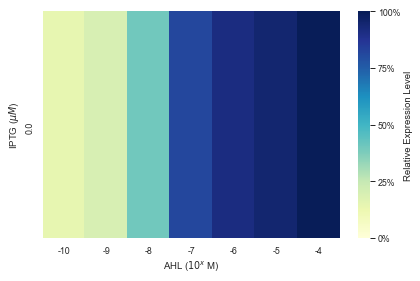

In [119]:
f, ax = plt.subplots()

make_heatmap(lx,ax,cmap='YlGnBu')

f.tight_layout()

In [19]:
R =[]
for i, fam in zip(mfi.IPTG.unique(),mfi.Family.unique()):
    tmp = mfi[(mfi.IPTG ==i) & (mfi.Family == fam)]['FITC-A'].max()/mfi[(mfi.IPTG ==i) & (mfi.Family == fam)]['FITC-A'].min()
    R.append([i,fam,tmp])
R = pd.DataFrame(R,columns=['IPTG','Family','Induction Ratio'])

In [20]:



# normalized
norm = mfi.copy()
for fam in norm.Family.unique():
    
    norm['FITC-A']=norm['FITC-A']/norm['FITC-A'].max()*100
    
piv = norm.pivot_table(index='IPTG', columns='logAHL', values='FITC-A')


C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


IndexError: list index out of range

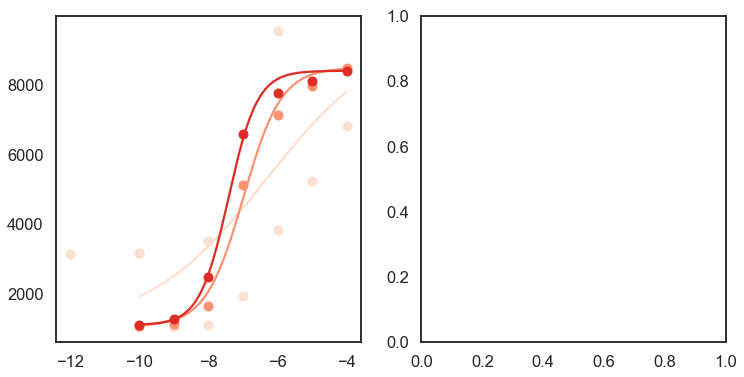

In [22]:
colors = ['#fee0d2','#fc9272','#de2d26']
sns.set_context('talk')
sns.set_style('white')
f, axes = plt.subplots(ncols=2,figsize=(12,6))

# fit Hill function
lines = []  
fits = pd.DataFrame(columns=['AHL','FITC-A','IPTG'])
for i,iptg in enumerate(mfi.IPTG.unique()):
    tmp = mfi[mfi.IPTG==iptg]
    def func(x, a, b):
        return (tmp['FITC-A'].max() -tmp['FITC-A'].min()) / (1 + 10**(a * (np.log10(b)-np.log10(x)))) + tmp['FITC-A'].min()
    (a_, b_), _ = opt.curve_fit(func, tmp.AHL, tmp['FITC-A'],p0=[1,1e-9],maxfev=10000000)
    n = 1e6
    x = np.linspace(tmp.AHL.min(), tmp.AHL.max(), int(n))
    y_fit = func(x, a_, b_)
    fits=fits.append(pd.DataFrame(np.concatenate([[x], [y_fit],[np.ones(len(x))*iptg]]).T,columns=['AHL','FITC-A','IPTG']),ignore_index=True)
    lines += axes[0].plot(np.log10(x), y_fit, '-',color = colors[i],label='IPTG {:.1f} fit'.format(iptg*1e3))
    lines += axes[0].plot(np.log10(tmp.AHL.values), tmp['FITC-A'].values, 'o',color = colors[i],label='IPTG {:.1f}'.format(iptg*1e3))

labels = [l.get_label() for l in lines]
g = sns.heatmap(piv, cmap='Reds',ax=axes[1])
cbar = g.collections[0].colorbar
cbar.set_ticks([0, 25, 50, 75,100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
axes[0].set_xlabel(r'AHL ($10^x$ M)')
axes[0].set_ylabel(r'mNG Intensity (au)')

axes[0].legend(labels,frameon=False)
axes[1].set_xlabel(r'AHL ($10^x$ M)')
axes[1].set_ylabel(r'IPTG (mM)')
axes[1].set_yticklabels(['0','0.2','1'])
#f.tight_layout()
#sns.barplot(x='IPTG',y='Induction Ratio',data=R,palette='Blues',ax=axes[2])
sns.despine()
#axes[1].xaxis.set_major_formatter(ticker.LogFormatter())
#axes[1].yaxis.set_major_formatter(ticker.ScalarFormatter())
#axes[1].ticklabel_format(axis='both',style='scientific')
f.tight_layout()
#f.savefig('LasSE.png',dpi=300)

In [23]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')
tmpdf = data[data.IPTG==I][['AHL','FITC-A']]
print('IPTG=' +str(I))
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(tmpdf, row="AHL", hue="AHL", aspect=10, height=.75, palette='Reds')#
#g.set(xlim=(0, 20000))
# Draw the densities in a few steps
g.map(sns.kdeplot, "FITC-A", clip_on=True, shade=True, alpha=1, lw=1,log_scale=True,bw_adjust=3)
g.map(sns.kdeplot, "FITC-A", clip_on=True, color="w", lw=2,log_scale=True,bw_adjust=3)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    #ax.set_xlim(1e2,2e5)
g.set(xlim=(1e3,1e5))

if I ==0.001:
    g.map(label, "FITC-A")
else:
    g.map(label, "FITC-A")
    for ax in g.axes.flat:
        ax.set_axis_off()
    g.set(xticks=[])

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
#plt.show()
#g.savefig('Ridge_Las_IPTG {:.1e}.pdf'.format(I))

NameError: name 'I' is not defined

IPTG=0.0


C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


IPTG=0.0002


C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


IPTG=0.001


C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


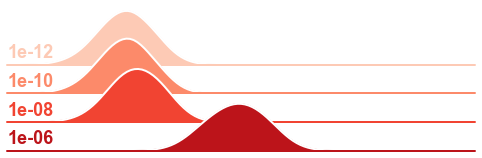

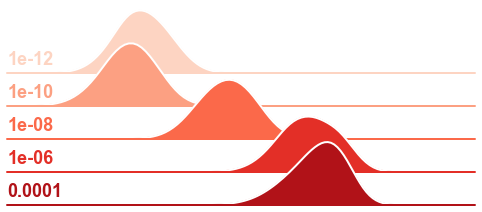

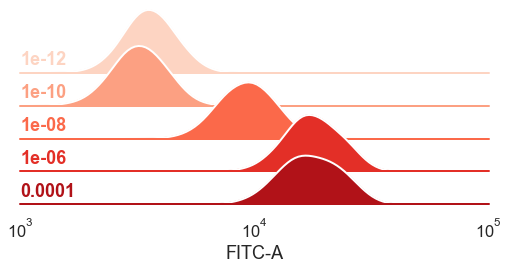

In [7]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')
for I in data.IPTG.unique():
    tmpdf = data[data.IPTG==I][['AHL','FITC-A']]
    print('IPTG=' +str(I))
    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(tmpdf, row="AHL", hue="AHL", aspect=10, height=.75, palette='Reds')#
    #g.set(xlim=(0, 20000))
    # Draw the densities in a few steps
    g.map(sns.kdeplot, "FITC-A", clip_on=True, shade=True, alpha=1, lw=1,log_scale=True,bw_adjust=3)
    g.map(sns.kdeplot, "FITC-A", clip_on=True, color="w", lw=2,log_scale=True,bw_adjust=3)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)
        #ax.set_xlim(1e2,2e5)
    g.set(xlim=(1e3,1e5))

    if I ==0.001:
        g.map(label, "FITC-A")
    else:
        g.map(label, "FITC-A")
        for ax in g.axes.flat:
            ax.set_axis_off()
        g.set(xticks=[])

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.5)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    #plt.show()
    #g.savefig('Ridge_Las_IPTG {:.1e}.pdf'.format(I))
